In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy
import os
from convert import *
import datetime
import time
import cvxpy as cp
from matplotlib import pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
import sklearn.covariance as skcov
import seaborn as sns

In [2]:
dir_list = os.listdir(r'D:\Capstone_Data\raw')

In [3]:
df0 = pd.read_hdf(r'D:\Capstone_Data\raw\{}'.format(dir_list[0])).set_index('time_utc')
symbols = pd.unique(df0.symbol)

In [12]:
def data_frame_by_freq(df, freq):
    sym_list = list(pd.unique(df.symbol))
    asset_dict = {}
    for sym in sym_list:
        one_sym_df = df[df.symbol == sym]
        resamp = one_sym_df.resample(freq).last().drop(columns='symbol')
        asset_dict[sym] = resamp
    return pd.concat(asset_dict, axis=1)

20220228_prices.h5


<Figure size 1280x960 with 0 Axes>

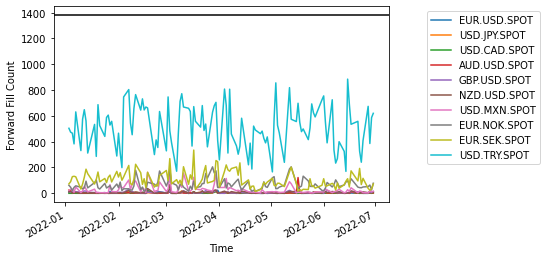

In [43]:
nan_count = {}
for file in dir_list:
    try:
        df = pd.read_hdf(r'D:\Capstone_Data\raw\{}'.format(file)).set_index('time_utc')
        df_out = data_frame_by_freq(df, '1Min')
        nan_count_df = df_out.isna().sum()
        syms_df =  np.unique([item[0] for item in nan_count_df.index])
        
        day = pd.Timestamp(year = int(file[:4]), month = int(file[4:6]), day = int(file[6:8]))
        
        if 'day' not in nan_count.keys():
            nan_count['day'] = [day]
        else:
            nan_count['day'].append(day)
        
        for sym in symbols:
            if sym not in syms_df:
                nan_count[sym].append(np.nan)
            else:
                if sym not in nan_count.keys():
                    nan_count[sym] = [nan_count_df[sym].bidprice1]
                else:
                    nan_count[sym].append(nan_count_df[sym].bidprice1)
    except:
        print(file)

nan_count_plot = pd.DataFrame(nan_count).set_index('day')
plt.figure(figsize=(16, 12), dpi=80)
nan_count_plot.plot()
plt.axhline(1380, c='k')
plt.legend(bbox_to_anchor=(1.1,1))
plt.xlabel('Time')
plt.ylabel('Forward Fill Count')
plt.show()

20220228_prices.h5


<Figure size 1280x960 with 0 Axes>

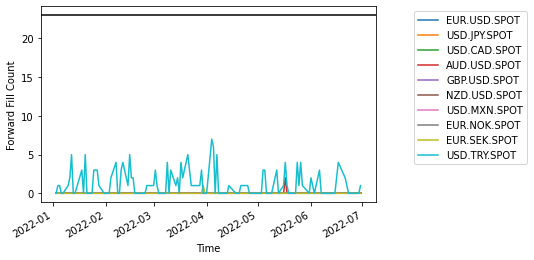

In [46]:
nan_count = {}
for file in dir_list:
    try:
        df = pd.read_hdf(r'D:\Capstone_Data\raw\{}'.format(file)).set_index('time_utc')
        df_out = data_frame_by_freq(df, '1h')
        nan_count_df = df_out.isna().sum()
        syms_df =  np.unique([item[0] for item in nan_count_df.index])
        
        day = pd.Timestamp(year = int(file[:4]), month = int(file[4:6]), day = int(file[6:8]))
        
        if 'day' not in nan_count.keys():
            nan_count['day'] = [day]
        else:
            nan_count['day'].append(day)
        
        for sym in symbols:
            if sym not in syms_df:
                nan_count[sym].append(np.nan)
            else:
                if sym not in nan_count.keys():
                    nan_count[sym] = [nan_count_df[sym].bidprice1]
                else:
                    nan_count[sym].append(nan_count_df[sym].bidprice1)
    except:
        print(file)

nan_count_plot = pd.DataFrame(nan_count).set_index('day')
plt.figure(figsize=(16, 12), dpi=80)
nan_count_plot.plot()
plt.axhline(23, c='k')
plt.legend(bbox_to_anchor=(1.1,1))
plt.xlabel('Time')
plt.ylabel('Forward Fill Count')
plt.show()

In [81]:
spread_ratio_max = {}
spread_ratio_median = {}
spread_ratio_min = {}
for file in dir_list:
    try:
        df = pd.read_hdf(r'D:\Capstone_Data\raw\{}'.format(file)).set_index('time_utc')
        day = pd.Timestamp(year = int(file[:4]), month = int(file[4:6]), day = int(file[6:8]))
        if 'day' not in spread_ratio_max.keys():
            spread_ratio_max['day'] = [day]
            spread_ratio_median['day'] = [day]
            spread_ratio_min['day'] = [day]
        else:
            spread_ratio_max['day'].append(day)
            spread_ratio_median['day'].append(day)
            spread_ratio_min['day'].append(day)

        for sym in symbols:
            df_temp = df[df.symbol==sym]
            sprd_r = (df_temp.askprice1-df_temp.bidprice1)/(0.5*(df_temp.askprice1+df_temp.bidprice1))
            if sym not in pd.unique(df.symbol):
                spread_ratio_max[sym].append(np.nan)
                spread_ratio_median[sym].append(np.nan)
                spread_ratio_min[sym].append(np.nan)
            else:
                if sym not in spread_ratio_max.keys():
                    spread_ratio_max[sym] = [sprd_r.max()*10000]
                    spread_ratio_median[sym] = [sprd_r.median()*10000]
                    spread_ratio_min[sym] = [sprd_r.min()*10000]
                else:
                    spread_ratio_max[sym].append(sprd_r.max()*10000)
                    spread_ratio_median[sym].append(sprd_r.median()*10000)
                    spread_ratio_min[sym].append(sprd_r.min()*10000)
    except:
        pass

<Figure size 1280x960 with 0 Axes>

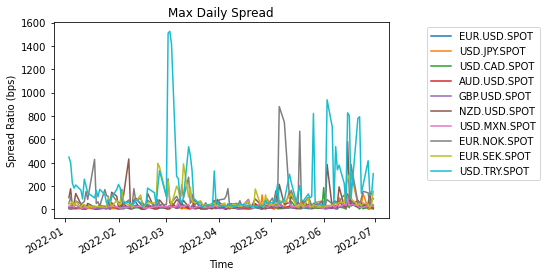

In [82]:
max_spread_plot = pd.DataFrame(spread_ratio_max).set_index('day')
plt.figure(figsize=(16, 12), dpi=80)
max_spread_plot.plot()
plt.legend(bbox_to_anchor=(1.1,1))
plt.xlabel('Time')
plt.ylabel('Spread Ratio (bps)')
plt.title('Max Daily Spread')
plt.show()

<Figure size 1280x960 with 0 Axes>

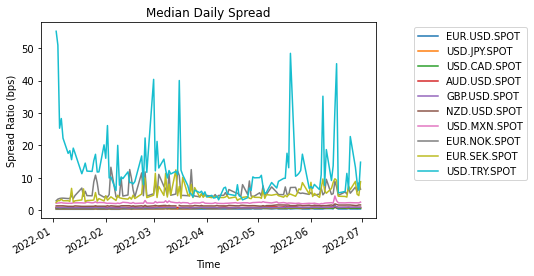

In [83]:
median_spread_plot = pd.DataFrame(spread_ratio_median).set_index('day')
plt.figure(figsize=(16, 12), dpi=80)
median_spread_plot.plot()
plt.legend(bbox_to_anchor=(1.1,1))
plt.xlabel('Time')
plt.ylabel('Spread Ratio (bps)')
plt.title('Median Daily Spread')
plt.show()

<Figure size 1280x960 with 0 Axes>

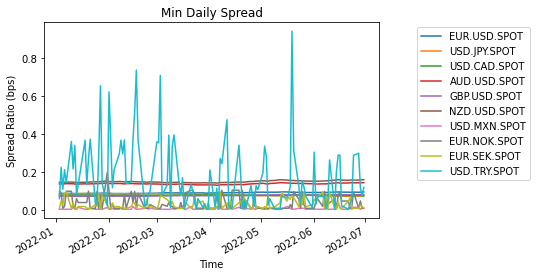

In [84]:
min_spread_plot = pd.DataFrame(spread_ratio_min).set_index('day')
plt.figure(figsize=(16, 12), dpi=80)
min_spread_plot.plot()
plt.legend(bbox_to_anchor=(1.1,1))
plt.xlabel('Time')
plt.ylabel('Spread Ratio (bps)')
plt.title('Min Daily Spread')
plt.show()